In [2]:
import json

In [33]:
#iam.ap-southeast-3.myhuaweicloud.com
endpoint = "ap-southeast-2.myhuaweicloud.com"
#"https://ocr.ap-southeast-2.myhuaweicloud.com"
# endpoint = "https://ocr.ap-southeast-2.myhuaweicloud.com"
with open('secret/config.json', 'r') as f:
    config = json.load(f)


In [43]:
# -*- coding: utf-8 -*-
import json
import requests

class ProduceToken:
    def __init__(self,config):
        self.config = config

    def SendBody(self):
        # 拼接Token
        jsonbody = {
            "auth": {
                "identity": {
                    "methods": [
                        "password"
                    ],
                    "password": {
                        "user": {
                            "name": self.config["username"],  # 用户名
                            "password": self.config["password"],  # 密码
                            "domain": {
                                "name": self.config["acc"]  # 账户名
                            }
                        }
                    }
                },
                "scope": {
                    "project": {
                        "id": self.config["project_id"]  # 语音识别所属区域为“华北-北京一”，默认项目名为“cn-north-1”
                    }
                }
            }
        }
#         print(jsonbody)
        return json.dumps(jsonbody)

    def getToken(self):
        bodyrequest = self.SendBody()
        requesturl = "https://iam."+endpoint+"/v3/auth/tokens"
        headers = {
            "Content-Type": "application/json",
        }
        response = requests.post(requesturl, data=bodyrequest, headers=headers)
#         return response
        token = response.headers.get("X-Subject-Token")
        return token


In [47]:
token = ProduceToken(config).getToken()
token[:20]

'MIIbygYJKoZIhvcNAQcC'

In [49]:
print('''POST  https://{endpoint}/v1.0/thailand-id-card

Request Header:
Content-Type: application/json
X-Auth-Token: MIINRwYJKoZIhvcNAQcCoIINODCCDTQCAQExDTALBglghkgBZQMEAgEwgguVBgkqhkiG...
Request Body: 
{
    "image":"/9j/4AAQSkZJRgABAgEASABIAAD/4RFZRXhpZgAATU0AKgAAAAgABwESAAMAA..."
}''')


POST  https://{endpoint}/v1.0/thailand-id-card

Request Header:
Content-Type: application/json
X-Auth-Token: MIINRwYJKoZIhvcNAQcCoIINODCCDTQCAQExDTALBglghkgBZQMEAgEwgguVBgkqhkiG...
Request Body: 
{
    "image":"/9j/4AAQSkZJRgABAgEASABIAAD/4RFZRXhpZgAATU0AKgAAAAgABwESAAMAA..."
}


In [55]:
url = "https://ocr."+endpoint+"/v1.0/thailand-id-card"
s = requests.Session()
s.headers.update({'X-Auth-Token': token})

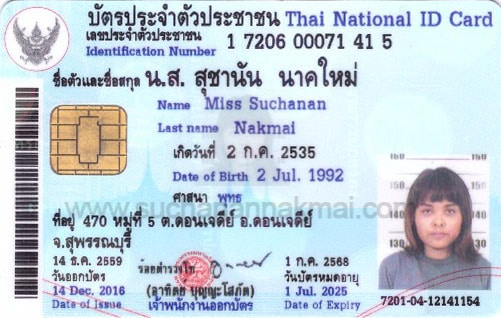

In [67]:
from PIL import Image
target_path = "privacy_resource/th_id_card.jpg"
Image.open(target_path)

In [69]:
import base64
with open(target_path, "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode('utf-8')

In [70]:
resp = s.post(url, json={"image":encoded_string})

In [71]:
resp.json()

{'result': {'address_th': '470 หมู่ที่ 5 ต.ดอนเจดีย์ อ.ดอนเจดีย์ จ.สุพรรณบุรี',
  'confidence': {'address_th': 0.5218,
   'date_of_birth_en': 1.0,
   'date_of_birth_th': 0.9999,
   'date_of_expiry_en': 0.9977,
   'date_of_expiry_th': 0.9592,
   'date_of_issue_en': 0.9893,
   'date_of_issue_th': 0.8348,
   'first_name_en': 0.9994,
   'id_number': 1.0,
   'last_name_en': 0.9999,
   'name_th': 0.9999,
   'portrait': 0,
   'religion_th': 0.9926,
   'serial_number': 0.9953},
  'date_of_birth_en': '2 Jul. 1992',
  'date_of_birth_th': '2 ก.ค. 2535',
  'date_of_expiry_en': '1 Jul. 2025',
  'date_of_expiry_th': '1 ก.ค. 2568',
  'date_of_issue_en': '14 Dec. 2016',
  'date_of_issue_th': '14 ธ.ค. 2559',
  'first_name_en': 'Miss Suchanan',
  'id_number': '1 7206 00071 41 5',
  'last_name_en': 'Nakmai',
  'name_th': 'น.ส. สุชานัน นาคใหม่',
  'portrait': '',
  'religion_th': 'พุทธ',
  'serial_number': '7201-04-12141154'}}